In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


In [2]:
train = pd.read_csv("parking_data/면적별_세대수_구분.csv")
train.head()

,단지코드,총세대수,임대건물구분,지역,빈집,노선수,버스,area10,area20,area30,area40,area50,area60,area70,area80,area100,주차면수,등록차량수
0,C2515,545,아파트,경상남도,17.0,0.0,3.0,0,0,356,57,132,0,0,0,0,624.0,205.0
1,C1407,1216,아파트,대전광역시,13.0,1.0,1.0,0,0,390,702,124,0,0,0,0,1285.0,1064.0
2,C1945,755,아파트,경기도,6.0,1.0,3.0,0,0,240,0,515,0,0,0,0,734.0,730.0
3,C1470,696,아파트,전라북도,14.0,0.0,2.0,0,0,254,196,246,0,0,0,0,645.0,553.0
4,C1898,566,아파트,전라북도,9.0,0.0,6.0,0,0,271,209,86,0,0,0,0,517.0,415.0


In [3]:
train["소형주택"]=train[["area10","area20","area30"]].sum(axis=1)/train["총세대수"]
train.head()

,단지코드,총세대수,임대건물구분,지역,빈집,노선수,버스,area10,area20,area30,area40,area50,area60,area70,area80,area100,주차면수,등록차량수,소형주택
0,C2515,545,아파트,경상남도,17.0,0.0,3.0,0,0,356,57,132,0,0,0,0,624.0,205.0,0.653211
1,C1407,1216,아파트,대전광역시,13.0,1.0,1.0,0,0,390,702,124,0,0,0,0,1285.0,1064.0,0.320724
2,C1945,755,아파트,경기도,6.0,1.0,3.0,0,0,240,0,515,0,0,0,0,734.0,730.0,0.317881
3,C1470,696,아파트,전라북도,14.0,0.0,2.0,0,0,254,196,246,0,0,0,0,645.0,553.0,0.364943
4,C1898,566,아파트,전라북도,9.0,0.0,6.0,0,0,271,209,86,0,0,0,0,517.0,415.0,0.478799


In [4]:
train["대중교통"] = train["노선수"]+train["버스"]
train.head()

,단지코드,총세대수,임대건물구분,지역,빈집,노선수,버스,area10,area20,area30,area40,area50,area60,area70,area80,area100,주차면수,등록차량수,소형주택,대중교통
0,C2515,545,아파트,경상남도,17.0,0.0,3.0,0,0,356,57,132,0,0,0,0,624.0,205.0,0.653211,3.0
1,C1407,1216,아파트,대전광역시,13.0,1.0,1.0,0,0,390,702,124,0,0,0,0,1285.0,1064.0,0.320724,2.0
2,C1945,755,아파트,경기도,6.0,1.0,3.0,0,0,240,0,515,0,0,0,0,734.0,730.0,0.317881,4.0
3,C1470,696,아파트,전라북도,14.0,0.0,2.0,0,0,254,196,246,0,0,0,0,645.0,553.0,0.364943,2.0
4,C1898,566,아파트,전라북도,9.0,0.0,6.0,0,0,271,209,86,0,0,0,0,517.0,415.0,0.478799,6.0


In [5]:
train = train.drop(["빈집","노선수","버스"], axis=1)
train.head()

,단지코드,총세대수,임대건물구분,지역,area10,area20,area30,area40,area50,area60,area70,area80,area100,주차면수,등록차량수,소형주택,대중교통
0,C2515,545,아파트,경상남도,0,0,356,57,132,0,0,0,0,624.0,205.0,0.653211,3.0
1,C1407,1216,아파트,대전광역시,0,0,390,702,124,0,0,0,0,1285.0,1064.0,0.320724,2.0
2,C1945,755,아파트,경기도,0,0,240,0,515,0,0,0,0,734.0,730.0,0.317881,4.0
3,C1470,696,아파트,전라북도,0,0,254,196,246,0,0,0,0,645.0,553.0,0.364943,2.0
4,C1898,566,아파트,전라북도,0,0,271,209,86,0,0,0,0,517.0,415.0,0.478799,6.0


In [6]:
pre_train = pd.read_csv("parking_data/pre_train.csv", index_col=[0])
pre_train

,단지코드,총세대수,임대건물구분,지역,전용면적,전용면적별세대수,빈집,임대료,노선수,버스,주차면수,등록차량수
8,C2515,545,아파트,경상남도,33.48,276,17.0,82940,0.0,3.0,624.0,205.0
9,C2515,545,아파트,경상남도,39.60,60,17.0,107130,0.0,3.0,624.0,205.0
10,C2515,545,아파트,경상남도,39.60,20,17.0,107130,0.0,3.0,624.0,205.0
11,C2515,545,아파트,경상남도,46.90,38,17.0,149760,0.0,3.0,624.0,205.0
12,C2515,545,아파트,경상남도,46.90,19,17.0,149760,0.0,3.0,624.0,205.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2947,C2532,239,아파트,강원도,49.20,19,7.0,116090,0.0,1.0,166.0,146.0
2948,C2532,239,아파트,강원도,51.08,34,7.0,142310,0.0,1.0,166.0,146.0
2949,C2532,239,아파트,강원도,51.73,34,7.0,142310,0.0,1.0,166.0,146.0
2950,C2532,239,아파트,강원도,51.96,114,7.0,142310,0.0,1.0,166.0,146.0


In [7]:
pre_train1 = pre_train.reset_index(drop=True)
pre_train1

,단지코드,총세대수,임대건물구분,지역,전용면적,전용면적별세대수,빈집,임대료,노선수,버스,주차면수,등록차량수
0,C2515,545,아파트,경상남도,33.48,276,17.0,82940,0.0,3.0,624.0,205.0
1,C2515,545,아파트,경상남도,39.60,60,17.0,107130,0.0,3.0,624.0,205.0
2,C2515,545,아파트,경상남도,39.60,20,17.0,107130,0.0,3.0,624.0,205.0
3,C2515,545,아파트,경상남도,46.90,38,17.0,149760,0.0,3.0,624.0,205.0
4,C2515,545,아파트,경상남도,46.90,19,17.0,149760,0.0,3.0,624.0,205.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2864,C2532,239,아파트,강원도,49.20,19,7.0,116090,0.0,1.0,166.0,146.0
2865,C2532,239,아파트,강원도,51.08,34,7.0,142310,0.0,1.0,166.0,146.0
2866,C2532,239,아파트,강원도,51.73,34,7.0,142310,0.0,1.0,166.0,146.0
2867,C2532,239,아파트,강원도,51.96,114,7.0,142310,0.0,1.0,166.0,146.0


In [8]:
mean_area = pre_train1.groupby("단지코드").mean()[["전용면적"]].reset_index()
mean_area

,단지코드,전용면적
0,C1000,45.218571
1,C1004,39.136842
2,C1005,54.360000
3,C1013,46.142000
4,C1014,49.232857
...,...,...
406,C2663,41.005000
407,C2666,43.258333
408,C2670,40.918000
409,C2680,43.350000


In [9]:
train = pd.merge(train, mean_area, on="단지코드")
train

,단지코드,총세대수,임대건물구분,지역,area10,area20,area30,area40,area50,area60,area70,area80,area100,주차면수,등록차량수,소형주택,대중교통,전용면적
0,C2515,545,아파트,경상남도,0,0,356,57,132,0,0,0,0,624.0,205.0,0.653211,3.0,44.345714
1,C1407,1216,아파트,대전광역시,0,0,390,702,124,0,0,0,0,1285.0,1064.0,0.320724,2.0,41.253636
2,C1945,755,아파트,경기도,0,0,240,0,515,0,0,0,0,734.0,730.0,0.317881,4.0,50.510000
3,C1470,696,아파트,전라북도,0,0,254,196,246,0,0,0,0,645.0,553.0,0.364943,2.0,42.982500
4,C1898,566,아파트,전라북도,0,0,271,209,86,0,0,0,0,517.0,415.0,0.478799,6.0,42.575000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,C2586,90,아파트,제주특별자치도,12,42,36,0,0,0,0,0,0,66.0,57.0,1.000000,3.0,26.616000
407,C2035,492,아파트,강원도,0,156,156,180,0,0,0,0,0,521.0,246.0,0.634146,1.0,36.150000
408,C2020,40,아파트,부산광역시,20,5,15,0,0,0,0,0,0,25.0,19.0,1.000000,3.0,26.616667
409,C2437,90,아파트,충청북도,0,90,0,0,0,0,0,0,0,30.0,16.0,1.000000,1.0,24.830000


In [10]:
pre_train = pre_train.reset_index(drop=True)
pre_train["법정주차대수"]=0
for i in range(len(pre_train)):
    if pre_train["전용면적"][i] > 85:
        if pre_train["지역"][i]=="서울특별시":
            pre_train["법정주차대수"][i]=pre_train["전용면적"][i]*pre_train["전용면적별세대수"][i]/65
        else:
            pre_train["법정주차대수"][i]=pre_train["전용면적"][i]*pre_train["전용면적별세대수"][i]/70
    else:
        if pre_train["지역"][i]=="서울특별시":
            pre_train["법정주차대수"][i]=pre_train["전용면적"][i]*pre_train["전용면적별세대수"][i]/75
        else:
            pre_train["법정주차대수"][i]=pre_train["전용면적"][i]*pre_train["전용면적별세대수"][i]/85
            
pre_train            

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_19196\553286891.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_train["법정주차대수"][i]=pre_train["전용면적"][i]*pre_train["전용면적별세대수"][i]/85


,단지코드,총세대수,임대건물구분,지역,전용면적,전용면적별세대수,빈집,임대료,노선수,버스,주차면수,등록차량수,법정주차대수
0,C2515,545,아파트,경상남도,33.48,276,17.0,82940,0.0,3.0,624.0,205.0,108.711529
1,C2515,545,아파트,경상남도,39.60,60,17.0,107130,0.0,3.0,624.0,205.0,27.952941
2,C2515,545,아파트,경상남도,39.60,20,17.0,107130,0.0,3.0,624.0,205.0,9.317647
3,C2515,545,아파트,경상남도,46.90,38,17.0,149760,0.0,3.0,624.0,205.0,20.967059
4,C2515,545,아파트,경상남도,46.90,19,17.0,149760,0.0,3.0,624.0,205.0,10.483529
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2864,C2532,239,아파트,강원도,49.20,19,7.0,116090,0.0,1.0,166.0,146.0,10.997647
2865,C2532,239,아파트,강원도,51.08,34,7.0,142310,0.0,1.0,166.0,146.0,20.432000
2866,C2532,239,아파트,강원도,51.73,34,7.0,142310,0.0,1.0,166.0,146.0,20.692000
2867,C2532,239,아파트,강원도,51.96,114,7.0,142310,0.0,1.0,166.0,146.0,69.687529


In [11]:
pre_train["법정주차대수"]=round(pre_train["법정주차대수"],0)
pre_train

,단지코드,총세대수,임대건물구분,지역,전용면적,전용면적별세대수,빈집,임대료,노선수,버스,주차면수,등록차량수,법정주차대수
0,C2515,545,아파트,경상남도,33.48,276,17.0,82940,0.0,3.0,624.0,205.0,109.0
1,C2515,545,아파트,경상남도,39.60,60,17.0,107130,0.0,3.0,624.0,205.0,28.0
2,C2515,545,아파트,경상남도,39.60,20,17.0,107130,0.0,3.0,624.0,205.0,9.0
3,C2515,545,아파트,경상남도,46.90,38,17.0,149760,0.0,3.0,624.0,205.0,21.0
4,C2515,545,아파트,경상남도,46.90,19,17.0,149760,0.0,3.0,624.0,205.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2864,C2532,239,아파트,강원도,49.20,19,7.0,116090,0.0,1.0,166.0,146.0,11.0
2865,C2532,239,아파트,강원도,51.08,34,7.0,142310,0.0,1.0,166.0,146.0,20.0
2866,C2532,239,아파트,강원도,51.73,34,7.0,142310,0.0,1.0,166.0,146.0,21.0
2867,C2532,239,아파트,강원도,51.96,114,7.0,142310,0.0,1.0,166.0,146.0,70.0


In [12]:
parking_law = pre_train.groupby("단지코드").sum().reset_index()[["단지코드","법정주차대수"]]
parking_law

,단지코드,법정주차대수
0,C1000,281.0
1,C1004,238.0
2,C1005,719.0
3,C1013,707.0
4,C1014,486.0
...,...,...
406,C2663,380.0
407,C2666,557.0
408,C2670,309.0
409,C2680,359.0


In [13]:
train_final = pd.merge(train, parking_law, on="단지코드")

In [15]:
train_final.to_csv("parking_data/final_columns.csv", index=False)

In [182]:
train_final = pd.read_csv("parking_data/final_columns.csv")
train_final

,단지코드,총세대수,임대건물구분,지역,area10,area20,area30,area40,area50,area60,area70,area80,area100,주차면수,등록차량수,소형주택,대중교통,전용면적,법정주차대수
0,C2515,545,아파트,경상남도,0,0,356,57,132,0,0,0,0,624.0,205.0,0.653211,3.0,44.345714,258.0
1,C1407,1216,아파트,대전광역시,0,0,390,702,124,0,0,0,0,1285.0,1064.0,0.320724,2.0,41.253636,578.0
2,C1945,755,아파트,경기도,0,0,240,0,515,0,0,0,0,734.0,730.0,0.317881,4.0,50.510000,447.0
3,C1470,696,아파트,전라북도,0,0,254,196,246,0,0,0,0,645.0,553.0,0.364943,2.0,42.982500,367.0
4,C1898,566,아파트,전라북도,0,0,271,209,86,0,0,0,0,517.0,415.0,0.478799,6.0,42.575000,285.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,C2586,90,아파트,제주특별자치도,12,42,36,0,0,0,0,0,0,66.0,57.0,1.000000,3.0,26.616000,31.0
407,C2035,492,아파트,강원도,0,156,156,180,0,0,0,0,0,521.0,246.0,0.634146,1.0,36.150000,222.0
408,C2020,40,아파트,부산광역시,20,5,15,0,0,0,0,0,0,25.0,19.0,1.000000,3.0,26.616667,12.0
409,C2437,90,아파트,충청북도,0,90,0,0,0,0,0,0,0,30.0,16.0,1.000000,1.0,24.830000,26.0


In [183]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = ["지역"]
for l in label:
    le.fit(train_final[l])
    print(le.classes_)
    train_final[l] = le.transform(train_final[l])
train_final.head()

['강원도' '경기도' '경상남도' '경상북도' '광주광역시' '대구광역시' '대전광역시' '부산광역시' '서울특별시'
 '세종특별자치시' '울산광역시' '전라남도' '전라북도' '제주특별자치도' '충청남도' '충청북도']


,단지코드,총세대수,임대건물구분,지역,area10,area20,area30,area40,area50,area60,area70,area80,area100,주차면수,등록차량수,소형주택,대중교통,전용면적,법정주차대수
0,C2515,545,아파트,2,0,0,356,57,132,0,0,0,0,624.0,205.0,0.653211,3.0,44.345714,258.0
1,C1407,1216,아파트,6,0,0,390,702,124,0,0,0,0,1285.0,1064.0,0.320724,2.0,41.253636,578.0
2,C1945,755,아파트,1,0,0,240,0,515,0,0,0,0,734.0,730.0,0.317881,4.0,50.510000,447.0
3,C1470,696,아파트,12,0,0,254,196,246,0,0,0,0,645.0,553.0,0.364943,2.0,42.982500,367.0
4,C1898,566,아파트,12,0,0,271,209,86,0,0,0,0,517.0,415.0,0.478799,6.0,42.575000,285.0


In [17]:
train_final_x = train_final.drop(["단지코드","등록차량수"], axis=1)
train_final_x

,총세대수,임대건물구분,지역,area10,area20,area30,area40,area50,area60,area70,area80,area100,주차면수,소형주택,대중교통,전용면적,법정주차대수
0,545,0,2,0,0,356,57,132,0,0,0,0,624.0,0.653211,3.0,44.345714,258.0
1,1216,0,6,0,0,390,702,124,0,0,0,0,1285.0,0.320724,2.0,41.253636,578.0
2,755,0,1,0,0,240,0,515,0,0,0,0,734.0,0.317881,4.0,50.510000,447.0
3,696,0,12,0,0,254,196,246,0,0,0,0,645.0,0.364943,2.0,42.982500,367.0
4,566,0,12,0,0,271,209,86,0,0,0,0,517.0,0.478799,6.0,42.575000,285.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,90,0,13,12,42,36,0,0,0,0,0,0,66.0,1.000000,3.0,26.616000,31.0
407,492,0,0,0,156,156,180,0,0,0,0,0,521.0,0.634146,1.0,36.150000,222.0
408,40,0,7,20,5,15,0,0,0,0,0,0,25.0,1.000000,3.0,26.616667,12.0
409,90,0,15,0,90,0,0,0,0,0,0,0,30.0,1.000000,1.0,24.830000,26.0


In [20]:
train_final_xx = train_final_x.drop(["주차면수","임대건물구분"], axis=1)
train_final_xx

,총세대수,지역,area10,area20,area30,area40,area50,area60,area70,area80,area100,소형주택,대중교통,전용면적,법정주차대수
0,545,2,0,0,356,57,132,0,0,0,0,0.653211,3.0,44.345714,258.0
1,1216,6,0,0,390,702,124,0,0,0,0,0.320724,2.0,41.253636,578.0
2,755,1,0,0,240,0,515,0,0,0,0,0.317881,4.0,50.510000,447.0
3,696,12,0,0,254,196,246,0,0,0,0,0.364943,2.0,42.982500,367.0
4,566,12,0,0,271,209,86,0,0,0,0,0.478799,6.0,42.575000,285.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,90,13,12,42,36,0,0,0,0,0,0,1.000000,3.0,26.616000,31.0
407,492,0,0,156,156,180,0,0,0,0,0,0.634146,1.0,36.150000,222.0
408,40,7,20,5,15,0,0,0,0,0,0,1.000000,3.0,26.616667,12.0
409,90,15,0,90,0,0,0,0,0,0,0,1.000000,1.0,24.830000,26.0


In [40]:
train_final_xx["법정주차대수"]=train_final_xx["법정주차대수"]*1.1
train_final_xx

,총세대수,지역,area10,area20,area30,area40,area50,area60,area70,area80,area100,소형주택,대중교통,전용면적,법정주차대수
0,545,2,0,0,356,57,132,0,0,0,0,0.653211,3.0,44.345714,283.8
1,1216,6,0,0,390,702,124,0,0,0,0,0.320724,2.0,41.253636,635.8
2,755,1,0,0,240,0,515,0,0,0,0,0.317881,4.0,50.510000,491.7
3,696,12,0,0,254,196,246,0,0,0,0,0.364943,2.0,42.982500,403.7
4,566,12,0,0,271,209,86,0,0,0,0,0.478799,6.0,42.575000,313.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,90,13,12,42,36,0,0,0,0,0,0,1.000000,3.0,26.616000,34.1
407,492,0,0,156,156,180,0,0,0,0,0,0.634146,1.0,36.150000,244.2
408,40,7,20,5,15,0,0,0,0,0,0,1.000000,3.0,26.616667,13.2
409,90,15,0,90,0,0,0,0,0,0,0,1.000000,1.0,24.830000,28.6


In [80]:
train_final_xx["area90"] = 0

In [146]:
train_final_xx = train_final_xx.drop("전용면적", axis=1)

In [153]:
train_final_xx

,총세대수,지역,area10,area20,area30,area40,area50,area60,area70,area80,area100,소형주택,대중교통,법정주차대수,area90
0,545,2,0,0,356,57,132,0,0,0,0,0.653211,3.0,283.8,0
1,1216,6,0,0,390,702,124,0,0,0,0,0.320724,2.0,635.8,0
2,755,1,0,0,240,0,515,0,0,0,0,0.317881,4.0,491.7,0
3,696,12,0,0,254,196,246,0,0,0,0,0.364943,2.0,403.7,0
4,566,12,0,0,271,209,86,0,0,0,0,0.478799,6.0,313.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,90,13,12,42,36,0,0,0,0,0,0,1.000000,3.0,34.1,0
407,492,0,0,156,156,180,0,0,0,0,0,0.634146,1.0,244.2,0
408,40,7,20,5,15,0,0,0,0,0,0,1.000000,3.0,13.2,0
409,90,15,0,90,0,0,0,0,0,0,0,1.000000,1.0,28.6,0


In [147]:
train_final_y = train_final[["등록차량수"]]
train_final_y

,등록차량수
0,205.0
1,1064.0
2,730.0
3,553.0
4,415.0
...,...
406,57.0
407,246.0
408,19.0
409,16.0


In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import SGD, Adam, RMSprop

In [154]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_final_xx, train_final_y.values, test_size=0.2)

In [155]:
input_label = X_train.shape[1]
model = Sequential()
model.add(Flatten(input_shape=(input_label,)))
model.add(Dense(128, activation="linear", kernel_initializer="he_normal"))
model.add(Dense(128, activation="linear", kernel_initializer="he_normal"))
model.add(Dense(128, activation="linear", kernel_initializer="he_normal"))
model.add(Dropout(0.2))
model.add(Dense(128, activation="linear", kernel_initializer="he_normal"))
model.add(Dense(128, activation="linear", kernel_initializer="he_normal"))
model.add(Dropout(0.2))
model.add(Dense(1, activation="linear"))
model.compile(loss="mse", optimizer=SGD(learning_rate=1e-9), metrics=["mae"])
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 15)                0         
                                                                 
 dense_54 (Dense)            (None, 128)               2048      
                                                                 
 dense_55 (Dense)            (None, 128)               16512     
                                                                 
 dense_56 (Dense)            (None, 128)               16512     
                                                                 
 dropout_18 (Dropout)        (None, 128)               0         
                                                                 
 dense_57 (Dense)            (None, 128)               16512     
                                                                 
 dense_58 (Dense)            (None, 128)              

In [156]:
result = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))

Epoch 1/100
11/11 [==============================] - 1s 17ms/step - loss: 17823720.0000 - mae: 2663.7158 - val_loss: 68618.2891 - val_mae: 185.5792
Epoch 2/100
11/11 [==============================] - 0s 5ms/step - loss: 721278.2500 - mae: 580.6602 - val_loss: 42142.5469 - val_mae: 140.9416
Epoch 3/100
11/11 [==============================] - 0s 5ms/step - loss: 605605.0000 - mae: 544.2663 - val_loss: 130690.2188 - val_mae: 251.7244
Epoch 4/100
11/11 [==============================] - 0s 4ms/step - loss: 857435.6875 - mae: 621.3965 - val_loss: 42150.3984 - val_mae: 153.5550
Epoch 5/100
11/11 [==============================] - 0s 5ms/step - loss: 591935.3125 - mae: 533.2317 - val_loss: 38326.8125 - val_mae: 122.3188
Epoch 6/100
11/11 [==============================] - 0s 5ms/step - loss: 694387.6875 - mae: 544.0036 - val_loss: 39397.8477 - val_mae: 127.9088
Epoch 7/100
11/11 [==============================] - 0s 5ms/step - loss: 651770.2500 - mae: 539.3816 - val_loss: 130955.5156 - val_

In [157]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_val, model.predict(X_val)))

3/3 [==============================] - 0s 2ms/step


181.5693913715131

In [158]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(train_final_y, model.predict(train_final_xx)))

13/13 [==============================] - 0s 1ms/step


204.16794787557149

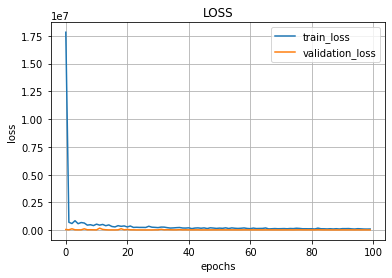

In [159]:
import matplotlib.pyplot as plt
plt.title("LOSS")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.grid()

plt.plot(result.history["loss"], label="train_loss")
plt.plot(result.history["val_loss"], label="validation_loss")
plt.legend(loc="best")

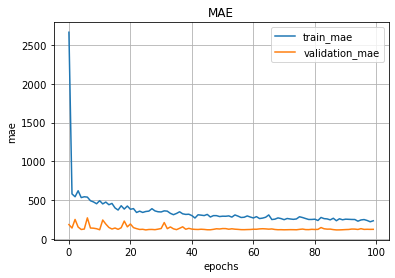

In [160]:
plt.title("MAE")
plt.xlabel("epochs")
plt.ylabel("mae")
plt.grid()

plt.plot(result.history["mae"], label="train_mae")
plt.plot(result.history["val_mae"], label="validation_mae")
plt.legend(loc="best")

In [70]:
model.save("parking_data/model1")

INFO:tensorflow:Assets written to: parking_data/model1\assets


INFO:tensorflow:Assets written to: parking_data/model1\assets


In [162]:
model.save("parking_data/model2")

INFO:tensorflow:Assets written to: parking_data/model2\assets


INFO:tensorflow:Assets written to: parking_data/model2\assets


In [161]:
pd.DataFrame(model.predict(train_final_xx))
check_answer = pd.concat([train_final_y, pd.DataFrame(model.predict(train_final_xx))], axis=1)
check_answer["차이"]=abs(check_answer["등록차량수"]-check_answer[0])
check_answer

13/13 [==============================] - 0s 1ms/step


,등록차량수,0,차이
0,205.0,381.872803,176.872803
1,1064.0,1077.296387,13.296387
2,730.0,640.618896,89.381104
3,553.0,592.777954,39.777954
4,415.0,469.732544,54.732544
...,...,...,...
406,57.0,37.143333,19.856667
407,246.0,334.720825,88.720825
408,19.0,22.678127,3.678127
409,16.0,16.931065,0.931065


In [163]:
check_answer = check_answer.sort_values(by="차이", ascending=False)
check_answer["비율"]=check_answer["등록차량수"]/check_answer[0]
check_answer["비율1"]=check_answer[0]/check_answer["등록차량수"]
check_answer

,등록차량수,0,차이,비율,비율1
342,2550.0,1436.630249,1113.369751,1.774987,0.563384
333,1832.0,965.104614,866.895386,1.898240,0.526804
24,98.0,849.411316,751.411316,0.115374,8.667462
64,376.0,1070.051514,694.051514,0.351385,2.845882
56,839.0,1510.895996,671.895996,0.555300,1.800830
...,...,...,...,...,...
409,16.0,16.931065,0.931065,0.945009,1.058192
135,401.0,400.110809,0.889191,1.002222,0.997783
67,204.0,203.196365,0.803635,1.003955,0.996061
395,266.0,265.714783,0.285217,1.001073,0.998928


In [164]:
check_index = pd.concat([check_answer[check_answer["비율"]<=0.5],check_answer[check_answer["비율"]>=1.5]], axis=1).index

In [165]:
check_index

Int64Index([ 24,  64,  27,  29,  34,  16,  45,  11,  38,  19,  18,  13,  46,
            164,  43,  26,  23,  21,  52, 386,  25,  55,  37,  65,  62,  42,
             68,  69,  28, 399,  57,  12,  60,  32,  17,  15,  49,  61,  33,
            261, 342, 333, 296, 269, 341, 193, 275, 306, 373, 354, 358, 248,
            403,  86, 371, 345, 356, 377, 355, 339, 392,  96, 336, 367, 319,
            369, 349, 179, 396, 376, 406],
           dtype='int64')

In [166]:
len(check_index)

71

In [52]:
train_final.iloc[check_index].describe()

,총세대수,임대건물구분,지역,area10,area20,area30,area40,area50,area60,area70,area80,area100,주차면수,등록차량수,소형주택,대중교통,전용면적,법정주차대수
count,67.000000,67.0,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000
mean,821.791045,0.0,5.820896,3.820896,291.223881,264.059701,142.477612,101.626866,0.104478,11.388060,2.283582,0.373134,408.940299,223.611940,0.642417,3.865672,43.628441,355.791045
std,516.683232,0.0,4.634931,22.081066,472.427061,218.105749,208.556028,275.733558,0.526116,92.347656,18.568306,0.598883,335.033191,203.012834,0.385964,2.497851,9.858262,214.678091
min,26.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,13.000000,0.000000,1.000000,23.156667,9.000000
25%,496.500000,0.0,2.000000,0.000000,0.000000,89.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,158.500000,92.000000,0.302408,2.000000,37.911333,199.500000
50%,693.000000,0.0,6.000000,0.000000,0.000000,247.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,287.000000,149.000000,0.697412,3.000000,42.753333,294.000000
75%,1003.500000,0.0,7.000000,0.000000,374.500000,392.000000,258.000000,37.500000,0.000000,0.000000,0.000000,1.000000,571.000000,284.000000,0.996227,4.500000,48.110952,478.000000
max,2428.000000,0.0,15.000000,180.000000,1885.000000,960.000000,870.000000,1533.000000,4.000000,756.000000,152.000000,2.000000,1493.000000,995.000000,1.000000,13.000000,77.380000,1034.000000


In [53]:
train_final["주차면수_평균"]=(train_final["법정주차대수"]+train_final["주차면수"])/2
train_final

,단지코드,총세대수,임대건물구분,지역,area10,area20,area30,area40,area50,area60,area70,area80,area100,주차면수,등록차량수,소형주택,대중교통,전용면적,법정주차대수,주차면수_평균
0,C2515,545,0,2,0,0,356,57,132,0,0,0,0,624.0,205.0,0.653211,3.0,44.345714,258.0,441.0
1,C1407,1216,0,6,0,0,390,702,124,0,0,0,0,1285.0,1064.0,0.320724,2.0,41.253636,578.0,931.5
2,C1945,755,0,1,0,0,240,0,515,0,0,0,0,734.0,730.0,0.317881,4.0,50.510000,447.0,590.5
3,C1470,696,0,12,0,0,254,196,246,0,0,0,0,645.0,553.0,0.364943,2.0,42.982500,367.0,506.0
4,C1898,566,0,12,0,0,271,209,86,0,0,0,0,517.0,415.0,0.478799,6.0,42.575000,285.0,401.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,C2586,90,0,13,12,42,36,0,0,0,0,0,0,66.0,57.0,1.000000,3.0,26.616000,31.0,48.5
407,C2035,492,0,0,0,156,156,180,0,0,0,0,0,521.0,246.0,0.634146,1.0,36.150000,222.0,371.5
408,C2020,40,0,7,20,5,15,0,0,0,0,0,0,25.0,19.0,1.000000,3.0,26.616667,12.0,18.5
409,C2437,90,0,15,0,90,0,0,0,0,0,0,0,30.0,16.0,1.000000,1.0,24.830000,26.0,28.0


In [46]:
from sklearn.preprocessing import 
train_final_x

,총세대수,임대건물구분,지역,area10,area20,area30,area40,area50,area60,area70,area80,area100,주차면수,소형주택,대중교통,전용면적,법정주차대수
0,545,0,2,0,0,356,57,132,0,0,0,0,624.0,0.653211,3.0,44.345714,258.0
1,1216,0,6,0,0,390,702,124,0,0,0,0,1285.0,0.320724,2.0,41.253636,578.0
2,755,0,1,0,0,240,0,515,0,0,0,0,734.0,0.317881,4.0,50.510000,447.0
3,696,0,12,0,0,254,196,246,0,0,0,0,645.0,0.364943,2.0,42.982500,367.0
4,566,0,12,0,0,271,209,86,0,0,0,0,517.0,0.478799,6.0,42.575000,285.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,90,0,13,12,42,36,0,0,0,0,0,0,66.0,1.000000,3.0,26.616000,31.0
407,492,0,0,0,156,156,180,0,0,0,0,0,521.0,0.634146,1.0,36.150000,222.0
408,40,0,7,20,5,15,0,0,0,0,0,0,25.0,1.000000,3.0,26.616667,12.0
409,90,0,15,0,90,0,0,0,0,0,0,0,30.0,1.000000,1.0,24.830000,26.0


In [138]:
result = model.fit(train_final_x, train_final_y, epochs=500, validation_data=(X_val, y_val))

Epoch 1/500
13/13 [==============================] - 0s 7ms/step - loss: 45623.8945 - mae: 139.9560 - val_loss: 25142.8848 - val_mae: 115.8161
Epoch 2/500
13/13 [==============================] - 0s 5ms/step - loss: 44114.3789 - mae: 146.3348 - val_loss: 24561.8887 - val_mae: 115.6023
Epoch 3/500
13/13 [==============================] - 0s 4ms/step - loss: 41747.3281 - mae: 143.2406 - val_loss: 24486.4414 - val_mae: 115.2541
Epoch 4/500
13/13 [==============================] - 0s 4ms/step - loss: 43562.5195 - mae: 141.5980 - val_loss: 24371.4141 - val_mae: 114.3835
Epoch 5/500
13/13 [==============================] - 0s 4ms/step - loss: 44397.5273 - mae: 145.1639 - val_loss: 24201.2266 - val_mae: 113.9986
Epoch 6/500
13/13 [==============================] - 0s 4ms/step - loss: 47804.2617 - mae: 146.7595 - val_loss: 24381.9785 - val_mae: 114.9044
Epoch 7/500
13/13 [==============================] - 0s 4ms/step - loss: 45822.2969 - mae: 143.4492 - val_loss: 24569.0332 - val_mae: 115.4756

Epoch 58/500
13/13 [==============================] - 0s 5ms/step - loss: 41193.8398 - mae: 141.4514 - val_loss: 24351.5273 - val_mae: 117.0614
Epoch 59/500
13/13 [==============================] - 0s 4ms/step - loss: 38186.9062 - mae: 135.6175 - val_loss: 24349.4707 - val_mae: 115.8621
Epoch 60/500
13/13 [==============================] - 0s 5ms/step - loss: 44155.5430 - mae: 144.4659 - val_loss: 24430.0996 - val_mae: 116.1511
Epoch 61/500
13/13 [==============================] - 0s 4ms/step - loss: 48853.7891 - mae: 144.4579 - val_loss: 24278.6328 - val_mae: 115.9513
Epoch 62/500
13/13 [==============================] - 0s 4ms/step - loss: 38231.5430 - mae: 138.7547 - val_loss: 24392.3613 - val_mae: 116.1175
Epoch 63/500
13/13 [==============================] - 0s 5ms/step - loss: 42224.6523 - mae: 145.4906 - val_loss: 24037.8789 - val_mae: 114.6448
Epoch 64/500
13/13 [==============================] - 0s 5ms/step - loss: 43212.4922 - mae: 141.5628 - val_loss: 24043.6094 - val_mae: 1

Epoch 115/500
13/13 [==============================] - 0s 5ms/step - loss: 42273.8477 - mae: 144.6292 - val_loss: 24514.1680 - val_mae: 116.2749
Epoch 116/500
13/13 [==============================] - 0s 5ms/step - loss: 44603.0938 - mae: 139.9510 - val_loss: 24400.0801 - val_mae: 115.5462
Epoch 117/500
13/13 [==============================] - 0s 6ms/step - loss: 44032.6406 - mae: 139.1653 - val_loss: 24504.8438 - val_mae: 115.8432
Epoch 118/500
13/13 [==============================] - 0s 5ms/step - loss: 41072.1523 - mae: 140.8306 - val_loss: 24345.5957 - val_mae: 115.0730
Epoch 119/500
13/13 [==============================] - 0s 5ms/step - loss: 37686.5039 - mae: 139.5117 - val_loss: 24323.4277 - val_mae: 114.4165
Epoch 120/500
13/13 [==============================] - 0s 4ms/step - loss: 39174.9922 - mae: 137.9340 - val_loss: 24475.0938 - val_mae: 115.1946
Epoch 121/500
13/13 [==============================] - 0s 5ms/step - loss: 39756.5078 - mae: 137.0359 - val_loss: 24502.8047 - val

13/13 [==============================] - 0s 4ms/step - loss: 38639.9453 - mae: 134.0959 - val_loss: 24358.1289 - val_mae: 115.9975
Epoch 228/500
13/13 [==============================] - 0s 4ms/step - loss: 39978.8242 - mae: 136.0157 - val_loss: 24397.6816 - val_mae: 115.7913
Epoch 229/500
13/13 [==============================] - 0s 4ms/step - loss: 34785.1094 - mae: 133.5994 - val_loss: 24254.1621 - val_mae: 115.2828
Epoch 230/500
13/13 [==============================] - 0s 4ms/step - loss: 42866.2695 - mae: 137.6136 - val_loss: 24451.6934 - val_mae: 116.0274
Epoch 231/500
13/13 [==============================] - 0s 4ms/step - loss: 37361.2930 - mae: 134.1508 - val_loss: 24491.4180 - val_mae: 117.1854
Epoch 232/500
13/13 [==============================] - 0s 4ms/step - loss: 39465.9727 - mae: 133.9906 - val_loss: 24485.2109 - val_mae: 116.6165
Epoch 233/500
13/13 [==============================] - 0s 5ms/step - loss: 37370.1523 - mae: 134.0686 - val_loss: 24496.9375 - val_mae: 116.0599

13/13 [==============================] - 0s 6ms/step - loss: 34787.3594 - mae: 126.6676 - val_loss: 24070.5059 - val_mae: 114.6233
Epoch 340/500
13/13 [==============================] - 0s 5ms/step - loss: 42842.2734 - mae: 136.2287 - val_loss: 24099.6465 - val_mae: 114.7156
Epoch 341/500
13/13 [==============================] - 0s 5ms/step - loss: 40041.8203 - mae: 137.5899 - val_loss: 24102.8047 - val_mae: 114.9605
Epoch 342/500
13/13 [==============================] - 0s 5ms/step - loss: 34010.8359 - mae: 124.1314 - val_loss: 24236.5566 - val_mae: 115.3387
Epoch 343/500
13/13 [==============================] - 0s 5ms/step - loss: 37667.2578 - mae: 133.4192 - val_loss: 24020.9551 - val_mae: 114.1841
Epoch 344/500
13/13 [==============================] - 0s 6ms/step - loss: 34531.3477 - mae: 125.6698 - val_loss: 24034.2637 - val_mae: 114.8040
Epoch 345/500
13/13 [==============================] - 0s 4ms/step - loss: 37499.2891 - mae: 135.2275 - val_loss: 23997.3008 - val_mae: 114.4925

13/13 [==============================] - 0s 4ms/step - loss: 37153.0820 - mae: 129.5807 - val_loss: 24045.0176 - val_mae: 114.8993
Epoch 452/500
13/13 [==============================] - 0s 4ms/step - loss: 37330.6367 - mae: 132.0989 - val_loss: 23976.9688 - val_mae: 114.9420
Epoch 453/500
13/13 [==============================] - 0s 4ms/step - loss: 34557.1484 - mae: 125.9072 - val_loss: 23938.4570 - val_mae: 114.8880
Epoch 454/500
13/13 [==============================] - 0s 4ms/step - loss: 36437.6289 - mae: 131.0088 - val_loss: 23789.0508 - val_mae: 114.5436
Epoch 455/500
13/13 [==============================] - 0s 7ms/step - loss: 35654.9375 - mae: 129.2861 - val_loss: 23679.1582 - val_mae: 113.7062
Epoch 456/500
13/13 [==============================] - 0s 7ms/step - loss: 40917.6758 - mae: 138.7014 - val_loss: 23759.7949 - val_mae: 114.4956
Epoch 457/500
13/13 [==============================] - 0s 4ms/step - loss: 38618.7891 - mae: 134.9023 - val_loss: 23847.4668 - val_mae: 114.4108

In [139]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(train_final_y, model.predict(train_final_x)))
# 172.73436657472547

13/13 [==============================] - 0s 1ms/step


172.0655357143442

In [116]:
np.sqrt(29194.0781)

170.86274637848942

In [70]:
from sklearn.linear_model import Ridge

ridge01 = Ridge(alpha=1).fit(X_train, y_train)
Ridge_prediction = ridge01.predict(X_val)

from sklearn.metrics import mean_squared_error
ridge01_mse = mean_squared_error(y_val, Ridge_prediction)
ridge01_mse

33580.239505129844

In [71]:
np.sqrt(ridge01_mse)

183.24911870219142

In [84]:
print(ridge01.score(X_train, y_train))
ridge01.score(X_val,y_val)

0.8215348885064395


0.8087240602218915

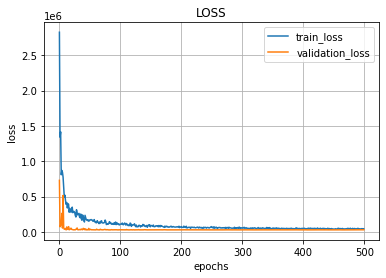

In [77]:
import matplotlib.pyplot as plt
plt.title("LOSS")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.grid()

plt.plot(result.history["loss"], label="train_loss")
plt.plot(result.history["val_loss"], label="validation_loss")
plt.legend(loc="best")

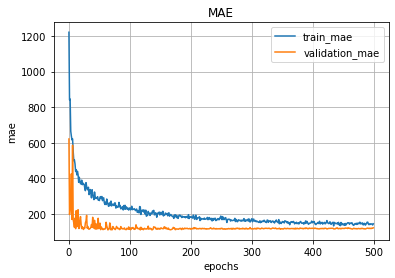

In [78]:
plt.title("MAE")
plt.xlabel("epochs")
plt.ylabel("mae")
plt.grid()

plt.plot(result.history["mae"], label="train_mae")
plt.plot(result.history["val_mae"], label="validation_mae")
plt.legend(loc="best")

In [132]:
pd.DataFrame(model.predict(train_final_x))
check_answer = pd.concat([train_final_y, pd.DataFrame(model.predict(train_final_x))], axis=1)
check_answer["차이"]=abs(check_answer["등록차량수"]-check_answer[0])
check_answer

13/13 [==============================] - 0s 1ms/step


,등록차량수,0,차이
0,205.0,505.260803,300.260803
1,1064.0,1128.493164,64.493164
2,730.0,729.291443,0.708557
3,553.0,603.918762,50.918762
4,415.0,457.471497,42.471497
...,...,...,...
406,57.0,47.969688,9.030312
407,246.0,420.260193,174.260193
408,19.0,23.854309,4.854309
409,16.0,19.465401,3.465401


In [133]:
check_answer = check_answer.sort_values(by="차이", ascending=False)
check_answer["비율"]=check_answer["등록차량수"]/check_answer[0]
check_answer["비율1"]=check_answer[0]/check_answer["등록차량수"]
check_answer

,등록차량수,0,차이,비율,비율1
342,2550.0,1418.690552,1131.309448,1.797432,0.556349
64,376.0,1116.655762,740.655762,0.336720,2.969829
27,316.0,1045.208740,729.208740,0.302332,3.307623
56,839.0,1537.233765,698.233765,0.545786,1.832221
404,619.0,1198.429321,579.429321,0.516509,1.936073
...,...,...,...,...,...
67,204.0,202.540939,1.459061,1.007204,0.992848
144,413.0,413.896973,0.896973,0.997833,1.002172
301,410.0,409.169861,0.830139,1.002029,0.997975
2,730.0,729.291443,0.708557,1.000972,0.999029


In [131]:
check_answer.mean()[:2]

등록차량수    564.318735
0        537.574036
dtype: float64

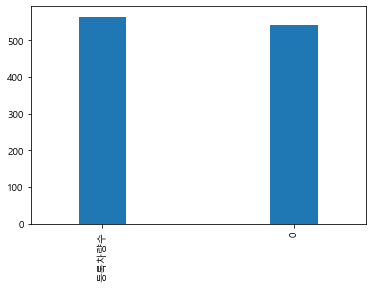

In [134]:
check_answer.mean()[:2].plot(kind="bar",width=0.25)
plt.xlabel=["등록차량수","예측값"]

In [135]:
check_answer.mean()[:2]

등록차량수    564.318735
0        540.618530
dtype: float64

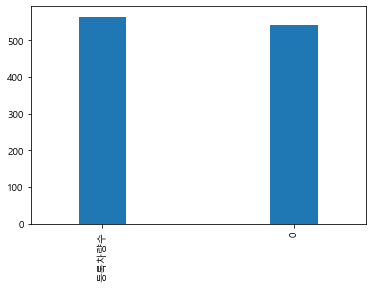

In [140]:
check_answer.mean()[:2].plot(kind="bar",width=0.25)
plt.xlabel=["등록차량수","예측값"]

In [141]:
check_answer.mean()[:2]

등록차량수    564.318735
0        540.618530
dtype: float64

In [502]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False

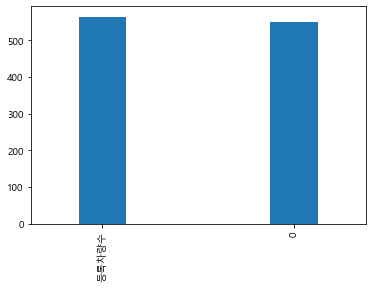

In [503]:
check_answer.mean()[:2].plot(kind="bar",width=0.25)
plt.xlabel=["등록차량수","예측값"]

In [504]:
check_answer.mean()[:2]

등록차량수    564.318735
0        551.270630
dtype: float64

In [506]:
graph = pd.DataFrame({"등록차량수":[564.318735,564.318735], "예측수":[537.574036,551.270630]})

In [539]:
graph.index=["model1", "model2"]

In [540]:
graph

,등록차량수,예측수
model1,564.318735,537.574036
model2,564.318735,551.270630


Text(1.2, 553, '551')

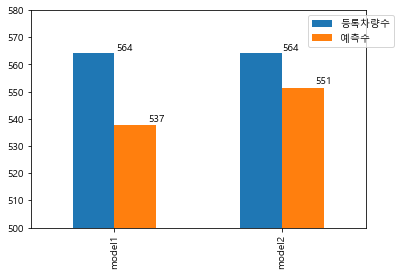

In [542]:
graph.plot(kind="bar")
plt.ylim(500,580)
plt.legend(bbox_to_anchor=(1.1, 1))
plt.text(0.01, 565, "564")
plt.text(0.2, 539, "537")
plt.text(1, 565, "564")
plt.text(1.2, 553, "551")

Text(1.2, 553, '551')

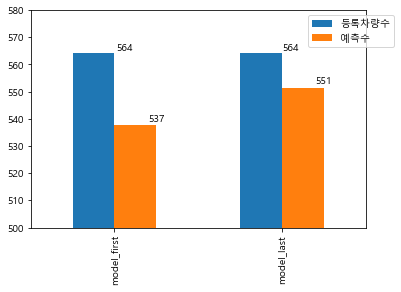

In [536]:
graph.plot(kind="bar")
plt.ylim(500,580)
plt.legend(bbox_to_anchor=(1.1, 1))
plt.text(0.01, 565, "564")
plt.text(0.2, 539, "537")
plt.text(1, 565, "564")
plt.text(1.2, 553, "551")

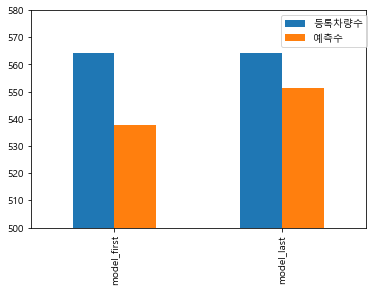

In [538]:
graph.plot(kind="bar")
plt.ylim(500,580)
plt.legend(bbox_to_anchor=(1.02, 1))


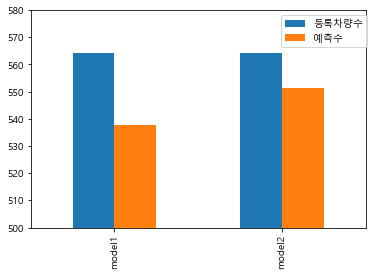

In [541]:
graph.plot(kind="bar")
plt.ylim(500,580)
plt.legend(bbox_to_anchor=(1.02, 1))


In [81]:
check_index = pd.concat([check_answer[check_answer["비율"]<=0.5],check_answer[check_answer["비율1"]>=1.5]], axis=1).index

In [82]:
len(check_index)

34

In [83]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X_train, y_train)
predict = linear.predict(X_val)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_val, predict)
print(mse)
print(np.sqrt(mse))

33837.619351632624
183.95004580492125


In [85]:
from sklearn.linear_model import Lasso
linear = Lasso()
linear.fit(X_train, y_train)
predict = linear.predict(X_val)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_val, predict)
print(mse)
print(np.sqrt(mse))

32609.842253653354
180.5819543964827


C:\Users\gyeoa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.024e+06, tolerance: 4.666e+03
  model = cd_fast.enet_coordinate_descent(


In [86]:
print(linear.score(X_train, y_train))
linear.score(X_val, y_val)

0.820469983654794


0.8142515266417156

In [200]:
print("<< 이 건물은 이정도의 주차대수가 필요합니다. >>")
print("\n지역예시:\n강원도,경기도,경상남도,경상북도,광주광역시,대구광역시,대전광역시,부산광역시,\n서울특별시,세종특별자치시,울산광역시,전라남도,전라북도,제주특별자치도,충청남도,충청북도")
loc = str(input("지역입력:"))
loc_list = ['강원도','경기도','경상남도','경상북도','광주광역시','대구광역시','대전광역시','부산광역시','서울특별시',
 '세종특별자치시','울산광역시','전라남도','전라북도','제주특별자치도','충청남도','충청북도']
while loc not in loc_list:
    print("지역예시에 있는 이름으로 다시 입력하세요")
    loc = str(input("지역입력:"))
try:
    size10 = int(input("10m2대의 세대 수:"))
except:
    print("\n숫자만 입력하세요")
    size10 = int(input("10m2대의 세대 수:"))
try:
    size20 = int(input("20m2대의 세대 수:"))
except:
    print("\n숫자만 입력하세요")
    size20 = int(input("20m2대의 세대 수:"))
try:
    size30 = int(input("30m2대의 세대 수:"))
except:
    print("\n숫자만 입력하세요")
    size30 = int(input("30m2대의 세대 수:"))
try:
    size40 = int(input("40m2대의 세대 수:"))
except:
    print("\n숫자만 입력하세요")
    size40 = int(input("40m2대의 세대 수:"))
try:
    size50 = int(input("50m2대의 세대 수:"))
except:
    print("\n숫자만 입력하세요")
    size50 = int(input("50m2대의 세대 수:"))
try:
    size60 = int(input("60m2대의 세대 수:"))
except:
    print("\n숫자만 입력하세요")
    size60 = int(input("60m2대의 세대 수:"))
try:
    size70 = int(input("70m2대의 세대 수:"))
except:
    print("\n숫자만 입력하세요")
    size70 = int(input("70m2대의 세대 수:"))
try:
    size80 = int(input("80m2대의 세대 수:"))
except:
    print("\n숫자만 입력하세요")
    size80 = int(input("80m2대의 세대 수:"))
try:
    size90 = int(input("90m2대의 세대 수:"))
except:
    print("\n숫자만 입력하세요")
    size90 = int(input("90m2대의 세대 수:"))
try:
    size100 = int(input("100m2대의 세대 수:"))
except:
    print("\n숫자만 입력하세요")
    size100 = int(input("100m2대의 세대 수:"))

try:
    public = int(input("걸어서 10분내 대중교통수(노선수((예시)1호선,2호선이 같이 있는 지하철역:2)+버스정류장 수)를 입력하세요:"))
except:
    print("\n숫자만 입력하세요")
    public = int(input("걸어서 10분내 대중교통수(노선수((예시)1호선,2호선이 같이 있는 지하철역:2)+버스정류장 수)를 입력하세요:"))

try:
    total_num = size10+size20+size30+size40+size50+size60+size70+size80+size90+size100
except:
    try:
        total_num = int(input("총 세대수를 입력해주세요:"))
    except:
        print("숫자만 입력하세요")
        total_num = int(input('총 세대수를 입력해주세요:'))
small = (size10+size20+size30)/total_num
final_loc = le.transform([loc])[0]
mean_area = (size10*10+size20*20+size30*30+size40*40+size50*50+size60*60+size70*70+size80*80+size90*90+size100*100)/total_num
if mean_area > 85:
    if loc=="서울특별시":
        law_parking = mean_area*total_num/65*1.1
    else:
        law_parking = mean_area*total_num/70*1.1
else:
    if loc=="서울특별시":
        law_parking = mean_area*total_num/75*1.1
    else:
        law_parking = mean_area*total_num/85*1.1
        

X = [[total_num, final_loc, size10, size20, size30, size40, size50, size60, size70, size80, size100, small, public, law_parking, size90]]
answer = model.predict(X)
answer = round(answer[0][0],0)


print("이 건물은 {}주차대수가 필요합니다.".format(answer))    

<< 이 건물은 이정도의 주차대수가 필요합니다. >>

지역예시:
강원도,경기도,경상남도,경상북도,광주광역시,대구광역시,대전광역시,부산광역시,
서울특별시,세종특별자치시,울산광역시,전라남도,전라북도,제주특별자치도,충청남도,충청북도
지역입력:경기도
10m2대의 세대 수:1
20m2대의 세대 수:3
30m2대의 세대 수:5
40m2대의 세대 수:5
50m2대의 세대 수:7
60m2대의 세대 수:7
70m2대의 세대 수:9
80m2대의 세대 수:3
90m2대의 세대 수:1
100m2대의 세대 수:0
걸어서 10분내 대중교통수(노선수((예시)1호선,2호선이 같이 있는 지하철역:2)+버스정류장 수)를 입력하세요:2
1/1 [==============================] - 0s 40ms/step
이 건물은 44.0주차대수가 필요합니다.
